(1) Data Description

The data analysis will use two files, players.csv (196 observations, 7 columns) and sessions.csv (1,535 observations, 5 columns). The data is being collected by a research group in Computer Science at UBC, led by Frank Wood. The data consists of these two files:

players.csv - one row per player, and columns include gender, age, hours played and experience

sessions.csv - one row per play session, and columns include start and end times

players.csv variables:
| variable | type | description |
|----------|------|-------------|
| experience | character | experience level (Beginner, Amateur, Regular, Pro, Veteran) |
| subscribe | logical | newsletter subscription (True/False) |
| hashedEmail | character | player identifier |
| played_hours | double | total hours played |
| name | character | player name |
| gender | character | player's gender |
| Age | double | age in years |

sessions.csv variables:
| variable | type | description |
|----------|------|-------------|
| hashedEmail | character | player identifier |
| start_time | character | session start time |
| end_time | character | session end time |
| original_start_time | double | raw start time |
| original_end_time | double | raw end time |

One potential issue that the data sets face are that there is missing data, which substitutes values for N/A. Additionally, players.csv is a relatively small data set with only 196 observations which may increase the difficulty in making accurate predictions.

(2) Questions

Broad question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific question: How might a player's experience and total hours played predict their tendency to subscribe to a newsletter, and how does this differ between players of various ages

(3) Exploratory Data Analysis and Visualization

In [12]:
library(tidyverse)

players <- read_csv("players.csv")
#Converts subscription to a factor and makes a new column which seperates age groups
players <- players |>
  mutate(
    subscribe = as.factor(subscribe),
    age_group = case_when(
      Age < 20 ~ "Under 20",
      Age >= 20 & Age <= 30 ~ "20 to 30",
      Age > 30 & Age <= 40 ~ "31 to 40",
      Age > 40 ~ "Over 40",
      TRUE ~ "Unknown"))

#Finds the mean for each numerical column
numeric_mean <- players |>
  select(where(is.numeric)) |>
  summarise(across(everything(), ~ round(mean(.x, na.rm = TRUE), 2)))

players
numeric_mean

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age,age_group
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,Under 20
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,Under 20
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,Under 20
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,20 to 30
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,20 to 30
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,Under 20
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,Under 20
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,20 to 30
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47,Over 40


played_hours,Age
<dbl>,<dbl>
5.85,21.14


Table shows mean values for each quantitative variable in the players.csv data set
| quantitative variable | mean | 
|----------|------|
| played_hours | 5.85 | 
| Age | 21.14 | 


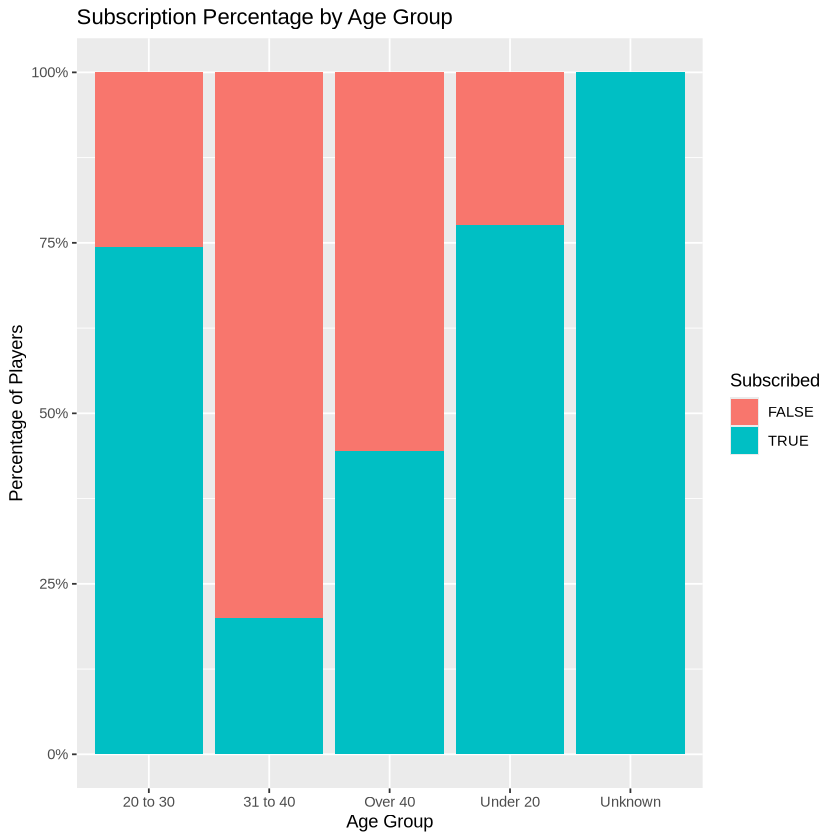

In [13]:
subscription_percentage <- ggplot(players, aes(x = age_group, fill = subscribe)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  labs(
    title = "Subscription Percentage by Age Group",
    x = "Age Group",
    y = "Percentage of Players",
    fill = "Subscribed"
  )
subscription_percentage

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


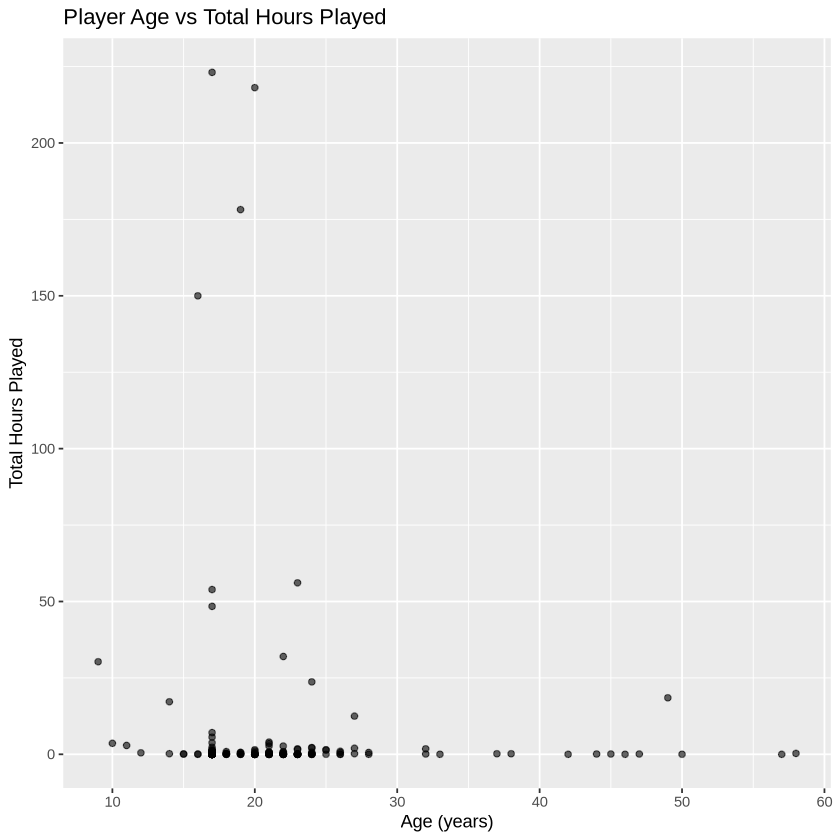

In [14]:
players_vs_hours <- ggplot(players, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.6) +
  labs(
    title = "Player Age vs Total Hours Played",
    x = "Age (years)",
    y = "Total Hours Played"
  )

players_vs_hours

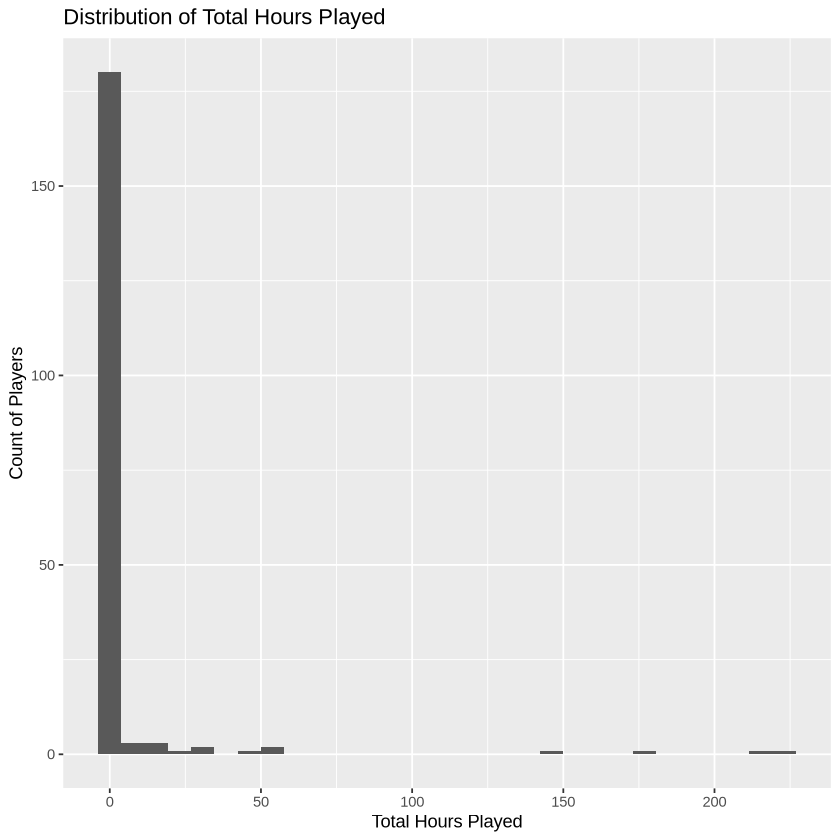

In [15]:
distribution_total_hours <- ggplot(players, aes(x = played_hours)) +
  geom_histogram(bins = 30) +
  labs(title = "Distribution of Total Hours Played",
    x = "Total Hours Played",
    y = "Count of Players")

distribution_total_hours

The bar plot shows the distribution of player ages across age ranges. Most players in this dataset are under the age of 40. Players under 30 make up the largest share of the population, while older age groups are represented less frequently. Essentially, the plot is useful in determining whether age groups are balanced and whether age is worth considering in this analysis.

The scatter plot shows the relationship between age and total hours played. Generally, as age increases, the total hours played tends to decrease.

The histogram shows the distribution of total hours played. Most players played for fewer than 10 hours which would indicate a large number of new or casual players.

(4) Methods and Plans

I plan to use a K-Nearest Neighbours classification model, and my goal is to predict whether a player subscribes to a newsletter by using their experience level and total hours played as predictors. I think that KNN is appropriate because the target variable is categorical (true/false). In this case, it will predict whether an individual subscribed to a newsletter based on the most common class of the nearest observations. I plan to scale the predictor variables, so that experience and played_hours are on the same scale. Furthermore, I will train the model using a certain proportion of the data set and evaluate the prediction accuracy on the remaining portion of data, using a train/test split. It is also important that there are no extreme imbalances in the data. However, this model could have potential limitations, such as the performance depending on the value of k. Moreover, KNN models could also be sensitive to outliers.